<a href="https://colab.research.google.com/github/Gaurav-Ramachandra/Sem6-ML_Lab/blob/main/ML%20Lab3%2024-3-25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1st dataset- clean.csv (only classification)

import pandas as pd
import numpy as np
import math
import random

# -------------------------------
# Utility Functions for ID3
# -------------------------------

def entropy(data, target_attribute):
    """
    Calculate the entropy of the target attribute in the dataset.
    """
    values, counts = np.unique(data[target_attribute], return_counts=True)
    ent = 0.0
    for i in range(len(values)):
        p = counts[i] / np.sum(counts)
        ent -= p * math.log2(p) if p > 0 else 0
    return ent

def info_gain(data, attribute, target_attribute):
    """
    Calculate the information gain of splitting the dataset on the given attribute.
    """
    total_entropy = entropy(data, target_attribute)
    values, counts = np.unique(data[attribute], return_counts=True)
    weighted_entropy = 0.0
    for i in range(len(values)):
        subset = data[data[attribute] == values[i]]
        weight = counts[i] / np.sum(counts)
        weighted_entropy += weight * entropy(subset, target_attribute)
    return total_entropy - weighted_entropy

def majority_class(data, target_attribute):
    """
    Return the majority class of the target attribute.
    """
    return data[target_attribute].mode()[0]

def id3(data, attributes, target_attribute, default_class=None):
    """
    Recursively build the decision tree using the ID3 algorithm.
    """
    # If dataset is empty, return the default class.
    if data.empty:
        return default_class

    # If all examples have the same class, return that class.
    if len(np.unique(data[target_attribute])) == 1:
        return data[target_attribute].iloc[0]

    # If no more attributes to split on, return the majority class.
    if len(attributes) == 0:
        return majority_class(data, target_attribute)

    # Set the default class to the majority class.
    default_class = majority_class(data, target_attribute)

    # Choose the attribute with the highest information gain.
    gains = {attr: info_gain(data, attr, target_attribute) for attr in attributes}
    best_attr = max(gains, key=gains.get)

    tree = {best_attr: {}}

    # For each possible value of the best attribute, build a subtree.
    for val in np.unique(data[best_attr]):
        subset = data[data[best_attr] == val]
        # Remove best_attr from attribute list for the subtree.
        subtree = id3(subset, [a for a in attributes if a != best_attr], target_attribute, default_class)
        tree[best_attr][val] = subtree

    return tree

def classify(tree, sample):
    """
    Classify a sample using the decision tree.
    """
    # If the tree is not a dict, it's a leaf node.
    if not isinstance(tree, dict):
        return tree

    # The root attribute for this subtree.
    attribute = list(tree.keys())[0]
    value = sample[attribute]

    # If the sample's attribute value is not seen, choose the first branch (default).
    if value not in tree[attribute]:
        subtree = list(tree[attribute].values())[0]
    else:
        subtree = tree[attribute][value]

    return classify(subtree, sample)

# -------------------------------
# Main Code: Load Data, Build Tree, and Evaluate
# -------------------------------

if __name__ == '__main__':
    # Load dataset from CSV (adjust file path as needed)
    file_path = "/content/drive/MyDrive/Sem-6/ML/Lab3/clean.csv"
    df = pd.read_csv(file_path)

    # Display dataset structure and first few rows
    print("Dataset Preview:")
    print(df.head())

    # OPTIONAL: Drop any unnecessary columns, e.g. an index column
    df = df.drop(columns=["Unnamed: 0"], errors='ignore')

    # Set the target attribute.
    # If you have a specific target column name, replace 'target' with it.
    target_attribute = 'target'
    if target_attribute not in df.columns:
        # If not found, assume the last column is the target.
        target_attribute = df.columns[-1]

    # Assume all other columns are features.
    attributes = list(df.columns)
    attributes.remove(target_attribute)

    # Split dataset into training and testing sets (80% train, 20% test)
    df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
    split_index = int(0.8 * len(df_shuffled))
    train_data = df_shuffled.iloc[:split_index]
    test_data = df_shuffled.iloc[split_index:]

    # Build the decision tree using the ID3 algorithm.
    decision_tree = id3(train_data, attributes, target_attribute)
    print("\nDecision Tree (ID3):")
    print(decision_tree)

    # Classify test examples and calculate accuracy.
    predictions = test_data.apply(lambda row: classify(decision_tree, row), axis=1)
    actual = test_data[target_attribute]
    accuracy = np.mean(predictions == actual)
    print(f"\nAccuracy on test set: {accuracy:.2f}")

    # Optionally, display predictions and actual values.
    comparison = pd.DataFrame({'Actual': actual, 'Predicted': predictions})
    print("\nComparison of Actual vs Predicted:")
    print(comparison.head())


Dataset Preview:
    Outlook Temperature Humidity    Wind Class
0  Overcast         Hot   Normal  Strong   Yes
1      Rain        Cool   Normal    Weak   Yes
2     Sunny         Hot     High    Weak    No
3     Sunny        Cool   Normal  Strong   Yes
4     Sunny        Mild     High    Weak    No

Decision Tree (ID3):
{'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

Accuracy on test set: 1.00

Comparison of Actual vs Predicted:
    Actual Predicted
800    Yes       Yes
801     No        No
802     No        No
803    Yes       Yes
804    Yes       Yes


In [ ]:
# 2nd dataset - data_authentication.csv (only classification)

import pandas as pd
import numpy as np
import math
import random

# -------------------------------
# Utility Functions for ID3
# -------------------------------

def entropy(data, target):
    """
    Calculate the entropy of the target attribute in the dataset.
    """
    values, counts = np.unique(data[target], return_counts=True)
    ent = 0.0
    for count in counts:
        p = count / np.sum(counts)
        if p > 0:
            ent -= p * math.log2(p)
    return ent

def info_gain(data, attribute, target):
    """
    Calculate the information gain of splitting the dataset on the given attribute.
    """
    total_entropy = entropy(data, target)
    values, counts = np.unique(data[attribute], return_counts=True)
    weighted_entropy = 0.0
    for i, value in enumerate(values):
        subset = data[data[attribute] == value]
        weight = counts[i] / np.sum(counts)
        weighted_entropy += weight * entropy(subset, target)
    return total_entropy - weighted_entropy

def majority_class(data, target):
    """
    Return the majority class of the target attribute.
    """
    return data[target].mode()[0]

def id3(data, attributes, target, default=None):
    """
    Recursively build the decision tree using the ID3 algorithm.
    """
    # If dataset is empty, return the default class.
    if data.empty:
        return default

    # If all examples have the same class, return that class.
    if len(np.unique(data[target])) == 1:
        return data[target].iloc[0]

    # If no more attributes to split on, return the majority class.
    if len(attributes) == 0:
        return majority_class(data, target)

    # Set the default class to the majority class.
    default = majority_class(data, target)

    # Choose the attribute with the highest information gain.
    gains = {attr: info_gain(data, attr, target) for attr in attributes}
    best_attr = max(gains, key=gains.get)

    # Create the tree node with the best attribute.
    tree = {best_attr: {}}

    # For each value of the best attribute, build a subtree.
    for value in np.unique(data[best_attr]):
        subset = data[data[best_attr] == value]
        subtree = id3(subset, [a for a in attributes if a != best_attr], target, default)
        tree[best_attr][value] = subtree

    return tree

def classify(tree, sample):
    """
    Classify a sample using the decision tree.
    """
    # If the tree is not a dict, it's a leaf node, so return the class.
    if not isinstance(tree, dict):
        return tree

    # Get the attribute at the current node.
    attribute = list(tree.keys())[0]
    value = sample[attribute]

    # Traverse the branch corresponding to the sample's attribute value.
    if value in tree[attribute]:
        subtree = tree[attribute][value]
    else:
        # If the value is unseen, choose one of the branches arbitrarily (default).
        subtree = list(tree[attribute].values())[0]

    return classify(subtree, sample)

# -------------------------------
# Main Code: Load Data, Build Tree, and Evaluate
# -------------------------------

# Load the dataset from CSV (ensure the file is in /mnt/data/)
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab3/bill_authentication.csv"
df = pd.read_csv(file_path)

# Display dataset preview
print("Dataset Preview:")
print(df.head())

# OPTIONAL: Drop any unnecessary columns (e.g., an index column)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Set the target column. If 'class' is not found, use the last column.
target = "class" if "class" in df.columns else df.columns[-1]

# Define the list of attributes (features) by excluding the target column.
attributes = list(df.columns)
attributes.remove(target)

# Shuffle the dataset and split it into training (80%) and testing (20%) sets.
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
split_index = int(0.8 * len(df_shuffled))
train_data = df_shuffled.iloc[:split_index]
test_data = df_shuffled.iloc[split_index:]

# Build the decision tree using the ID3 algorithm on the training data.
decision_tree = id3(train_data, attributes, target)
print("\nDecision Tree (ID3):")
print(decision_tree)

# Classify the test set and calculate accuracy.
predictions = test_data.apply(lambda row: classify(decision_tree, row), axis=1)
accuracy = np.mean(predictions == test_data[target])
print(f"\nAccuracy on test set: {accuracy:.2f}")

# Optionally, display a comparison of actual vs. predicted values.
comparison = pd.DataFrame({'Actual': test_data[target], 'Predicted': predictions})
print("\nComparison (first 10 examples):")
print(comparison.head(10))


Dataset Preview:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Decision Tree (ID3):
{'Variance': {np.float64(-7.0421): np.int64(1), np.float64(-6.9599): np.int64(1), np.float64(-6.7526): np.int64(1), np.float64(-6.7387): np.int64(1), np.float64(-6.651): np.int64(1), np.float64(-6.5773): np.int64(1), np.float64(-6.5235): np.int64(1), np.float64(-6.5084): np.int64(1), np.float64(-6.3679): np.int64(1), np.float64(-6.3364): np.int64(1), np.float64(-6.2815): np.int64(1), np.float64(-6.2003): np.int64(1), np.float64(-6.1632): np.int64(1), np.float64(-5.8818): np.int64(1), np.float64(-5.873): np.int64(1), np.float64(-5.637): np.int64(1), np.float64(-5.4901): np.int64(1), np.float64(-5.4808): np.int64(1), np.float64(-5.4414): np.int64(1), np.float64(-5.30

Dataset Preview:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Decision Tree Rules:

|--- Variance <= 0.32
|   |--- Skewness <= 5.87
|   |   |--- Curtosis <= 3.06
|   |   |   |--- class: 1
|   |   |--- Curtosis >  3.06
|   |   |   |--- Skewness <= -1.82
|   |   |   |   |--- Variance <= -0.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Variance >  -0.65
|   |   |   |   |   |--- Curtosis <= 7.53
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Curtosis >  7.53
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Skewness >  -1.82
|   |   |   |   |--- Curtosis <= 4.40
|   |   |   |   |   |--- Variance <= -1.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Variance >  -1.45
|   |   |   |   |   |   |--- class

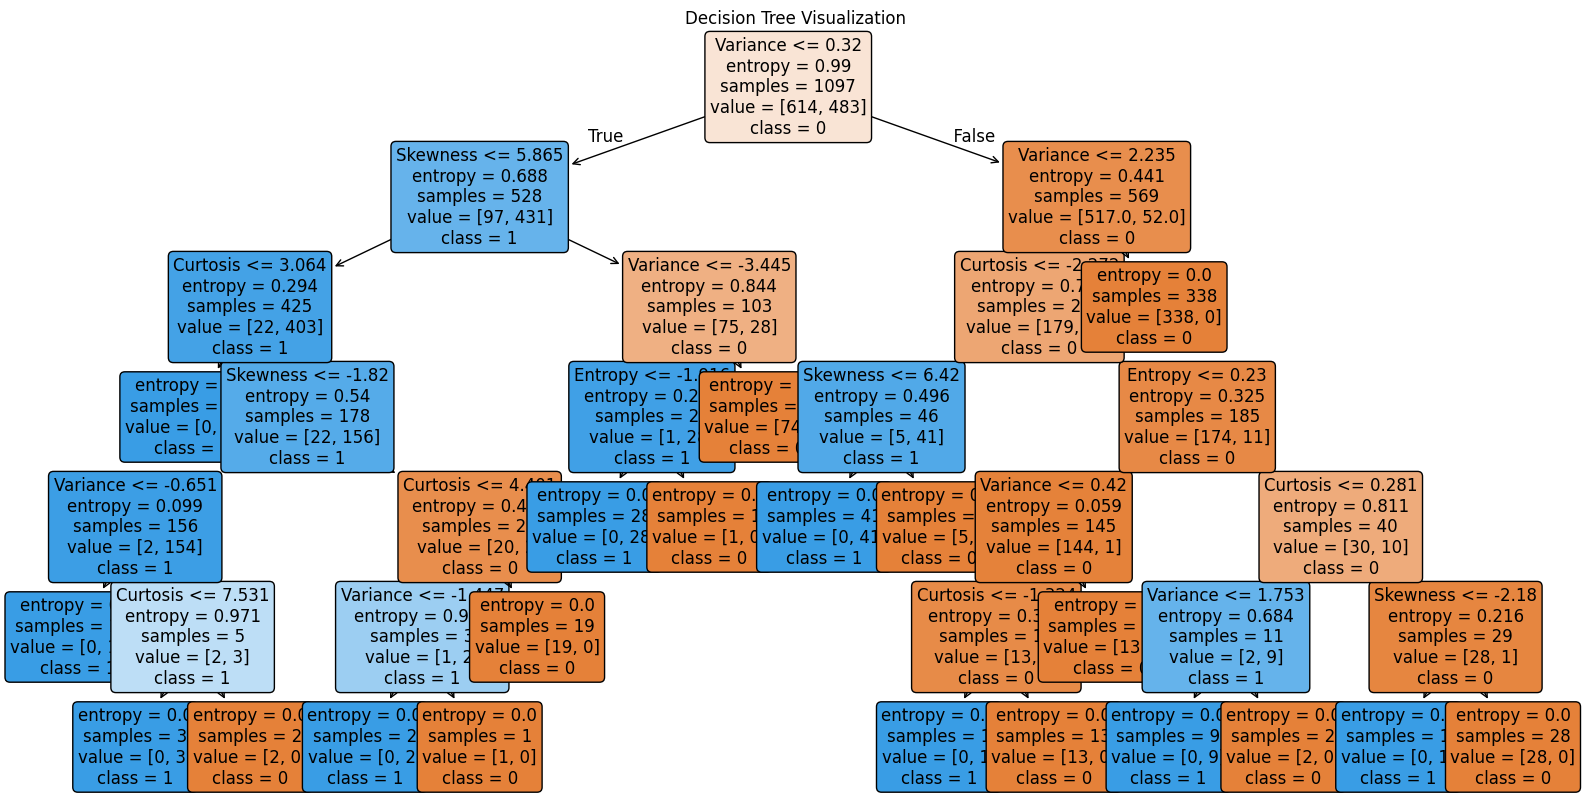

In [ ]:
# 2nd dataset - data_authentication code with decision tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Mount Google Drive if needed (for Colab)
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset (adjust the file path as necessary)
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab3/bill_authentication.csv"
df = pd.read_csv(file_path)

# Display the dataset's first few rows
print("Dataset Preview:")
print(df.head())

# OPTIONAL: Drop any unnecessary columns (e.g., index column)
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Assume the target column is named "class" (adjust if necessary)
target_column = "class" if "class" in df.columns else df.columns[-1]

# Define features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Decision Tree Classifier using the 'entropy' criterion (ID3)
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Print the decision tree rules in text format
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)

# Plot the decision tree pictorially
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=[str(c) for c in np.unique(y)],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()


Classification Dataset Preview:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Classification Accuracy: 0.9854545454545455

Decision Tree Rules (Classification):

|--- Variance <= 0.32
|   |--- Skewness <= 5.87
|   |   |--- Curtosis <= 3.06
|   |   |   |--- class: 1
|   |   |--- Curtosis >  3.06
|   |   |   |--- Skewness <= -1.82
|   |   |   |   |--- Variance <= -0.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Variance >  -0.65
|   |   |   |   |   |--- Curtosis <= 7.53
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Curtosis >  7.53
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Skewness >  -1.82
|   |   |   |   |--- Curtosis <= 4.40
|   |   |   |   |   |--- Variance <= -1.45
|   |   |   |   |   |   |--- class: 1


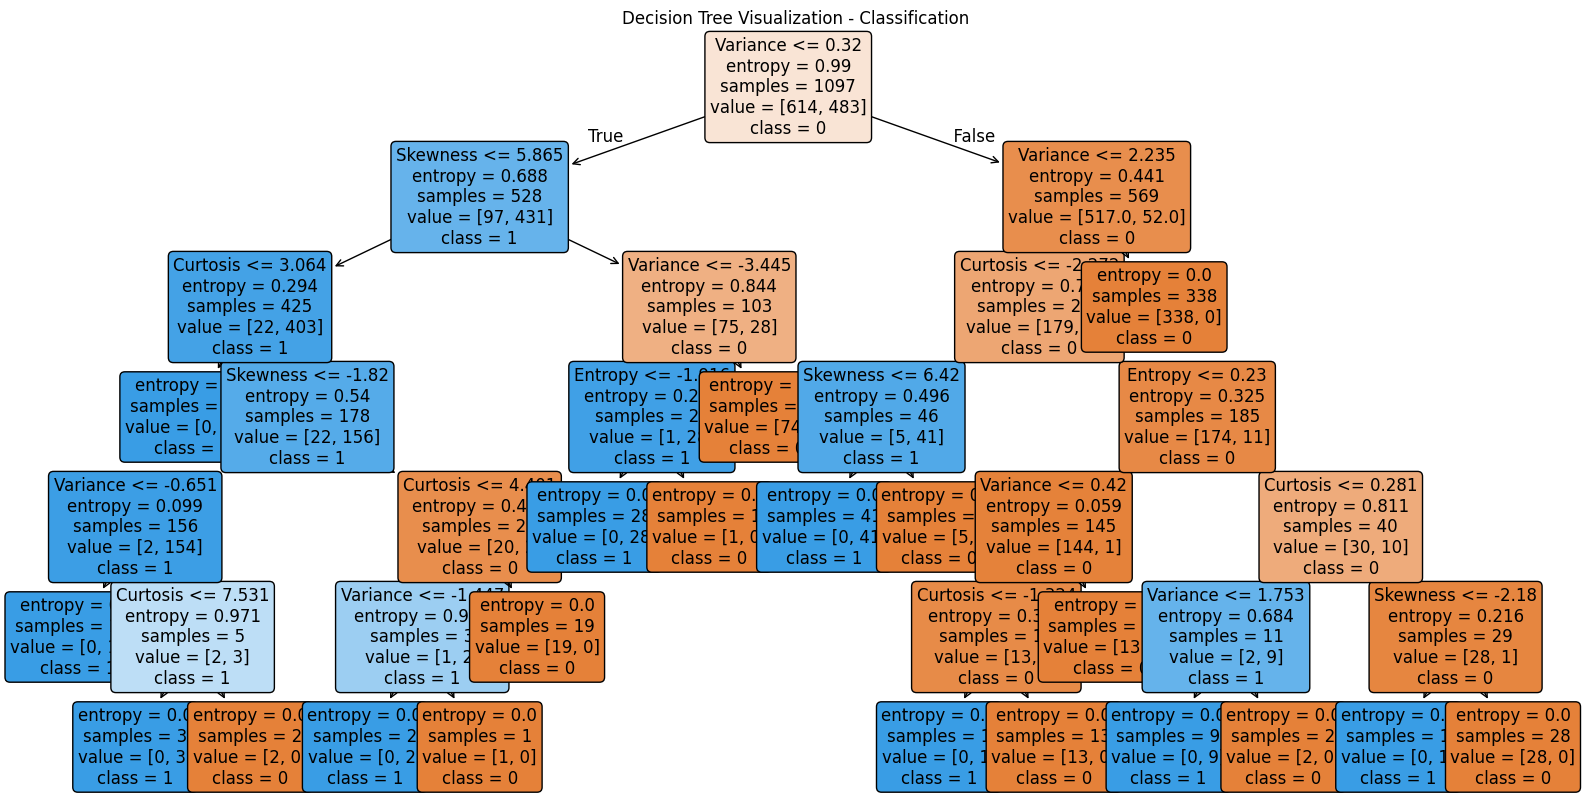


Regression Dataset Preview:
   Feature1  Feature2  Feature3  Feature4     Target
0 -0.923233 -1.406661 -0.611518 -1.351685 -76.766621
1 -1.344451 -0.281785 -0.420187 -0.918652 -70.015037
2 -2.067442 -0.032695  0.384065 -0.089120 -50.277862
3  0.307407 -0.276813 -0.221254  0.815737  -4.583817
4  0.916328 -1.998201  0.078635  0.346488  32.483670

Regression RMSE: 22.079870299371134
Regression R² Score: 0.848811322740017

Decision Tree Rules (Regression):

|--- Feature3 <= -0.01
|   |--- Feature1 <= 0.02
|   |   |--- Feature1 <= -1.07
|   |   |   |--- Feature3 <= -0.55
|   |   |   |   |--- Feature3 <= -2.24
|   |   |   |   |   |--- value: [-161.67]
|   |   |   |   |--- Feature3 >  -2.24
|   |   |   |   |   |--- Feature3 <= -1.40
|   |   |   |   |   |   |--- Feature2 <= 0.33
|   |   |   |   |   |   |   |--- value: [-108.76]
|   |   |   |   |   |   |--- Feature2 >  0.33
|   |   |   |   |   |   |   |--- value: [-115.90]
|   |   |   |   |   |--- Feature3 >  -1.40
|   |   |   |   |   |   |---

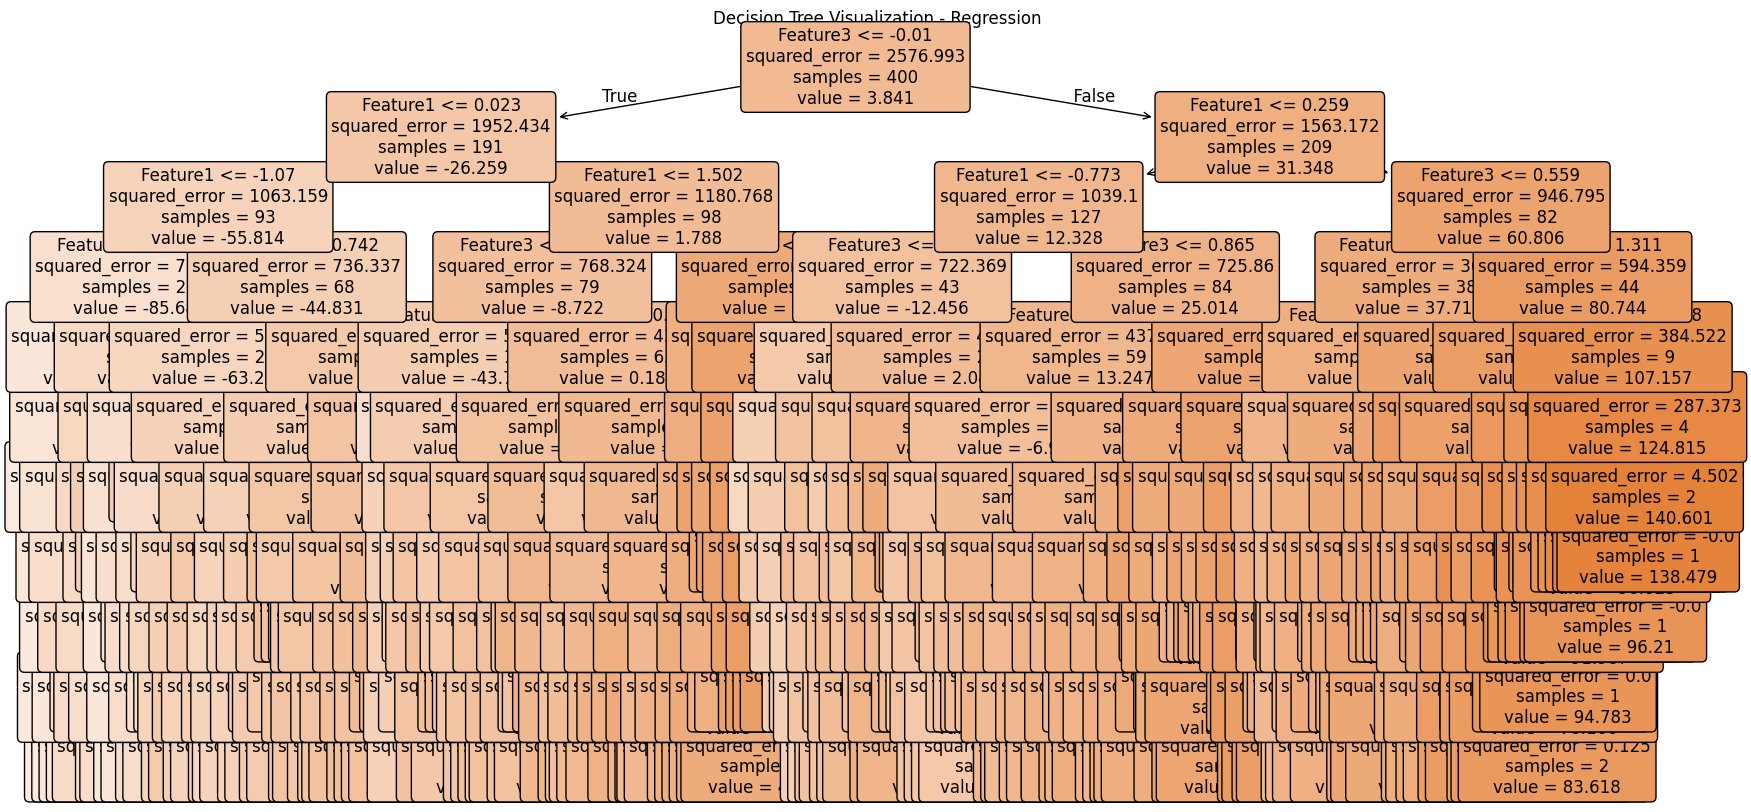

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.datasets import make_regression

# -------------------------------
# Section 1: Decision Tree Classification
# -------------------------------

# Load the classification dataset
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab3/bill_authentication.csv"
df_class = pd.read_csv(file_path)

print("Classification Dataset Preview:")
print(df_class.head())

# OPTIONAL: Drop any unnecessary columns
df_class = df_class.drop(columns=["Unnamed: 0"], errors="ignore")

# Assume target column is named "class". If not, use the last column.
target_col_class = "class" if "class" in df_class.columns else df_class.columns[-1]

# Define features and target for classification
X_class = df_class.drop(columns=[target_col_class])
y_class = df_class[target_col_class]

# Split into training and testing sets (80% train, 20% test)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Build and train the Decision Tree Classifier using the 'entropy' criterion (ID3 style)
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(Xc_train, yc_train)

# Predict on the test set and calculate accuracy
yc_pred = clf.predict(Xc_test)
accuracy = accuracy_score(yc_test, yc_pred)
print("\nClassification Accuracy:", accuracy)

# Export textual rules of the decision tree
tree_text_class = export_text(clf, feature_names=list(X_class.columns))
print("\nDecision Tree Rules (Classification):\n")
print(tree_text_class)

# Plot the decision tree graphically (Classification)
plt.figure(figsize=(20, 10))
class_names = [str(cls) for cls in np.unique(y_class)]
plot_tree(clf, feature_names=X_class.columns, class_names=class_names,
          filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization - Classification")
plt.show()

# -------------------------------
# Section 2: Decision Tree Regression
# -------------------------------

# Generate a synthetic regression dataset with increased noise to simulate a realistic problem.
X_reg, y_reg = make_regression(n_samples=500, n_features=4, noise=10, random_state=42)
# Convert to DataFrame for consistency
df_reg = pd.DataFrame(X_reg, columns=["Feature1", "Feature2", "Feature3", "Feature4"])
df_reg["Target"] = y_reg

print("\nRegression Dataset Preview:")
print(df_reg.head())

# Define features and target for regression
X_reg_features = df_reg.drop(columns=["Target"])
y_reg_target = df_reg["Target"]

# Split into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_features, y_reg_target, test_size=0.2, random_state=42)

# Build and train the Decision Tree Regressor with a specified maximum depth to control overfitting.
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
regressor.fit(Xr_train, yr_train)

# Predict on the test set and calculate metrics
yr_pred = regressor.predict(Xr_test)
mse = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, yr_pred)

print("\nRegression RMSE:", rmse)
print("Regression R² Score:", r2)

# Export textual rules of the decision tree (Regression)
tree_text_reg = export_text(regressor, feature_names=list(X_reg_features.columns))
print("\nDecision Tree Rules (Regression):\n")
print(tree_text_reg)

# Plot the decision tree graphically (Regression)
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X_reg_features.columns,
          filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization - Regression")
plt.show()
